<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-with-Python/blob/master/3_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Regresión
## [M.Sc. Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)

Seguimos con nuestra serie en la que estamos aprendiendo sobre *Machine Learning*. Si lo recuerdas, en nuestra introducción al ML, vimos las diferentes tareas que podemos resolver con esta tecnología. Estas son, principalmente: regresión, clasificación y *clustering*. En este post aprenderemos sobre la primera de ellas, la regresión.

## Regresión Lineal

La tarea de regresión consiste en encontrar una función que nos permita predecir el valor de una o más variables a partir de una o más características (o *features*). Un ejemplo sería el de predecir el precio de una casa a partir de su número de habitaciones, metros cuadrados, etc. El modelos de ML más sencillo para este tipo de tarea es el modelo de **regresión lineal**.

$$
  \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n
$$

donde $\hat{y}$ es el valor predicho, $w_i$ es el parámetro $i$ (incluyendo el *bias* $w_0$), $n$ es el número de características (*features*) y $x_i$ es la característica $i$. 

Entrenear un modelo de regresión lineal consiste en encontrar el conjunto de pesos, $w_i$, que minimizen una función de coste determinada. En el caso de la regresión, el error medio cuadrático suele utilizarse comunmente como medida del error:

$$
  MSE(\hat{y},y)  = \frac{1}{N} \sum^{N}_{j=1} (\hat{y}^{(j)} - y^{(j)})^2
$$

donde $N$ es el número de muestras en nuestro conjunto de datos, $y^{(i)}$ es el valor real, la etiqueta (o *ground truth*) de la muestra $j$.

Vamos a ver un ejemplo de como resolver este problema con el siguiente conjunto de datos simple.

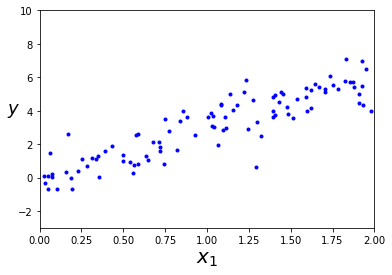

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, -3, 10])
plt.show()

En este caso tenemos una única caracterísitca, $x_1$, a partir de la cual queremos predecir una sola variable, $y$ (por ejemplo el precio de una casa en función de sus metros cuadrados). Podemos usar el modelo de `LinearRegression` de la librería `scikit-learn`.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.22108649]), array([[3.21107502]]))

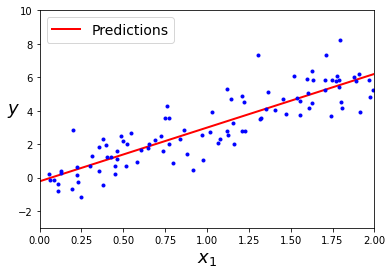

In [ ]:
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, -3, 10])
plt.show()

Como puedes ver, este método es muy sencillo, eficiente y explicable. Sin embargo, si nuestros datos no siguen una tendencia lineal el resultado que obtendremos no será muy bueno.

## Regresión polinomial

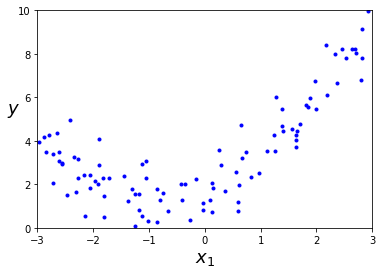

In [ ]:
import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

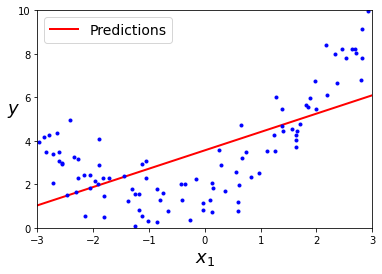

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = np.array([[-3], [3]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Para estos casos debermos primero de "procesar" nuestros datos para transformarlos a un sistema de coordenadas en los que el modelo de regresión lineal sea capaz de funcionar mejor. Es precisamente esto a lo que nos referimos con el concepto de *feature engineering*, darle a nuestro modelo los datos "masticados" para hacerle la vida más sencilla. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

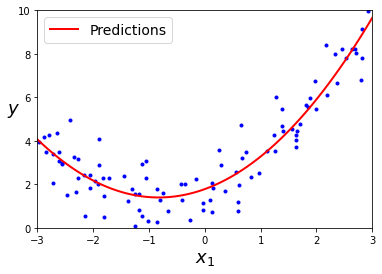

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Tu duda ahora debería ser: Vale, ¿pero como se de antemano si mis datos siguen una tendencia lineal o no (y más en el caso de trabajar con múltiples variables)? No hay una respuesta sencilla, más allá de probar diferentes grados de polinomios y quedarte con aquel que de mejores resultados. Gracias a `scikit-learn` podemos hacer esto de manera sencilla.

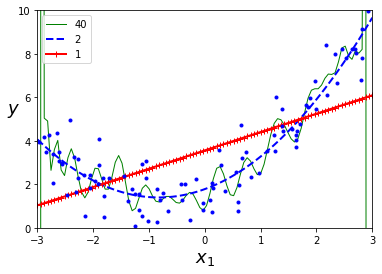

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 40), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Utilizar un grado muy bajo dará como resultado un modelo *underfitted*, mientras que un grado muy alto se traduce en *overfitting*. Evaluar los diferentes modelos en un conjunto de validación será necesario para establecer el mejor grado posible.

## Descenso por gradiente

Los ejemplos que hemos visto anteriormente tienen una limitación, y es que necesitan tener todo el conjunto de datos en memoria para entrenar el modelo. ¿Qué ocurre si esto no es posible? Una alternativa es utilizar un algoritmo de entrenamiento diferente, el conocido como **descenso por gradiente** que permite trabajar con subconjuntos de datos (o *mini-batches*).

> Hemos hablado en detalle sobre este algoritmo en posts anteriores, si no estas familiarizado con su funcionamiento te recomiendo que revises las clases de introducción

In [ ]:
import math 

poly_features = PolynomialFeatures(degree=2, include_bias=False)
std_scaler = StandardScaler()
feature_eng = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
])
X_poly = feature_eng.fit_transform(X)

eta = 0.05 #  alpha= tasa de aprendizaje
n_iterations = 10000
m = len(X_poly)

w1 = np.random.randn(2, 1)
w0 = 0.

batch_size = 50
n_batches = math.ceil(m / batch_size)
print(n_batches)

for iteration in range(n_iterations):
    for batch in range(n_batches):
        _x = X_poly[batch * batch_size: (batch + 1) * batch_size]
        _y = y[batch * batch_size: (batch + 1) * batch_size]
        y_hat = _x.dot(w1) + w0
        loss = np.mean((y_hat - _y)**2)
        grad_w1 = _x * 2.*(y_hat - _y)/m 
        grad_w0 = 2.*(y_hat - _y)/m
        w1 = w1 - eta * grad_w1.mean()
        w0 = w0 - eta * grad_w0.mean()
    if iteration % 1000 == 0:
        print(iteration, loss)

2
0 20.139666940503417
1000 7.875965360692319
2000 7.607022552851022
3000 7.595751331256557
4000 7.594581600003352
5000 7.594411065751112
6000 7.594384593757453
7000 7.594380418141419
8000 7.594379753362772
9000 7.5943796467171225


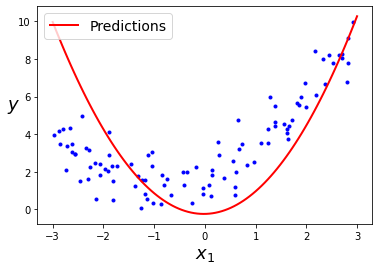

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = feature_eng.transform(X_new)
y_new = X_new_poly.dot(w1) + w0
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
plt.show()

## Resumen

En este post hemos introducido nuestro primeros algoritmo de ML: la regresión lineal. Este es un modelo muy sencillo y explicable (cada peso codifica la importancia de cada caracterísitica en la predicción). Además, es la base de modelos más complejos para tareas de clasificación (que veremos en el siguiente post). Sin embargo, tiene ciertas limitaciones: funcionará bien cuando nuestros datos sigan una tendencia lineal y podamos cargar todo el conjunto de datos en memoria. De no ser así deberemos usar alternativas como el *feature engineering* para transformar los datos a uno espacio de representación polinomial (en el que si sigan una tendencia lineal) o usar el algoritmo de descenso por gradiente para entrenar el modelo por *batches*.

Quizás has oído hablar de modelos de ML como la **regresión logística**, sin embargo (pese a su nombre), estos modelos son de **clasifiacación**, no de regresión (pese a que se basen en el mismo modelo) y por tanto los veremos en el siguiente post.